# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [32]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np



penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [34]:
data = pd.get_dummies(penguins, columns=['species', 'island', 'sex'])
data = data.dropna()
X = data.drop(columns="bill_depth_mm")
y = data["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#data

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Best multiple linear regression

In [35]:
ctr4 = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"]),
       ("passthrough", "passthrough", ["species_Adelie", "species_Chinstrap", "species_Gentoo", "island_Biscoe", "island_Dream", "island_Torgersen", "sex_female", "sex_male"])
    ],
    remainder="drop"
)

lr_pipeline4 = Pipeline(
    [("preprocessing", ctr4),
     ("lr", LinearRegression())]
)
lr_fit = lr_pipeline4.fit(X, y)
y_pred_lr = lr_fit.predict(X)

In [36]:
mse = mean_squared_error(y, y_pred_lr)
mse

0.616536522207337

In [37]:
r2 = lr_pipeline4.score(X, y)
r2

0.8414423106821936

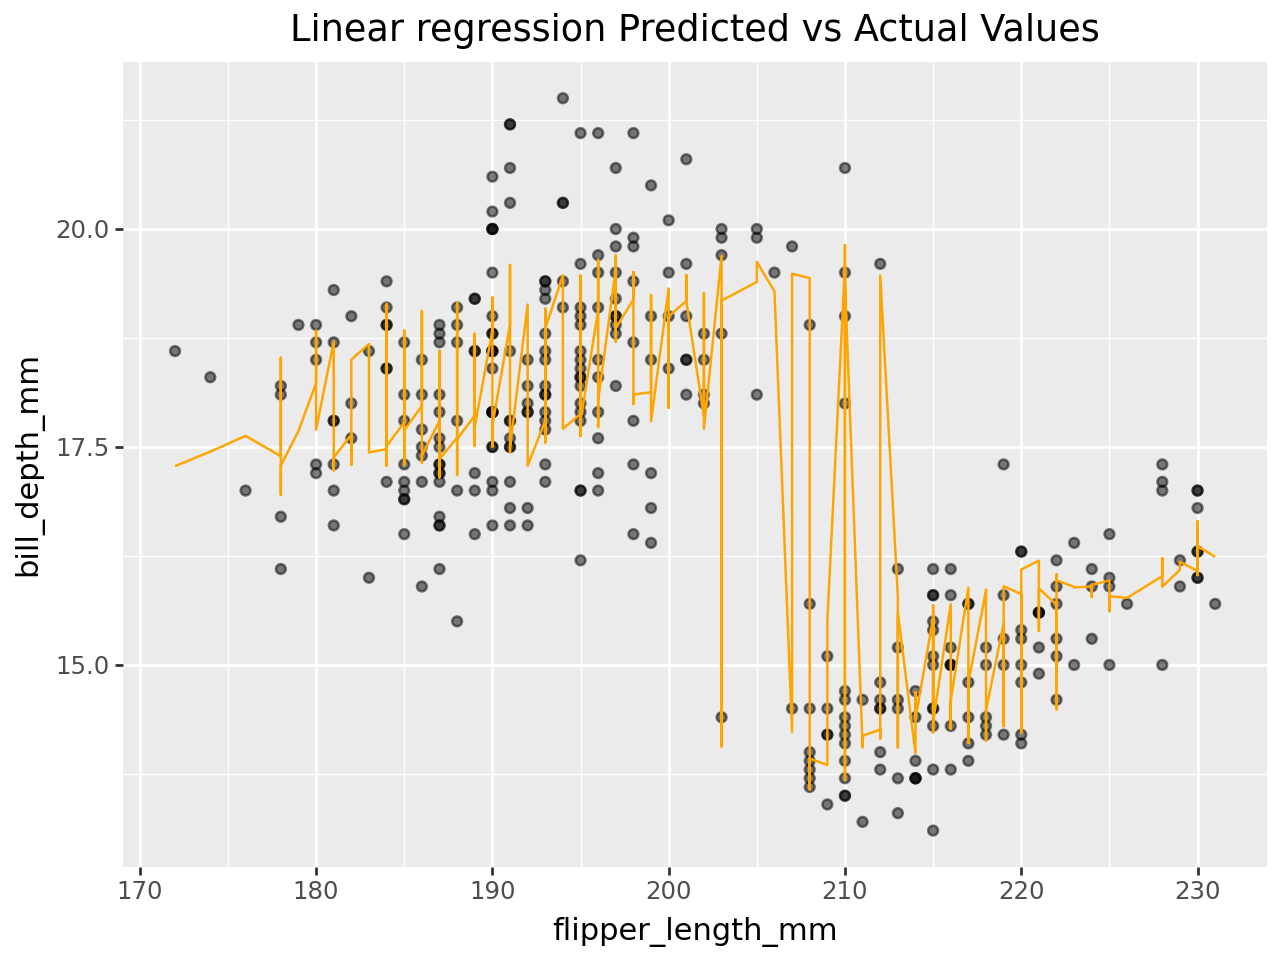

In [40]:
(ggplot(data, aes(x='flipper_length_mm', y='bill_depth_mm'))+
    geom_point(alpha=0.5)+
    geom_line(aes(y='y_pred_lr'), color="orange")+
    labs(title="Linear regression Predicted vs Actual Values")
)

Knn 1

In [41]:
ct_knn = ColumnTransformer(
    [
        ("dummify",
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_pipeline1 = Pipeline(
    [
        ("preprocessing", ct_knn),
        ("knn", KNeighborsRegressor(n_neighbors=5))
    ]
).set_output(transform="pandas")



In [42]:
knn_pipeline1.fit(X, y)


y_pred_knn = knn_pipeline1.predict(X)
mse = mean_squared_error(y, y_pred_knn)
mse

0.44690058479532174

In [43]:
r2_train = knn_pipeline1.score(X, y)
r2_train

0.8850684079083752

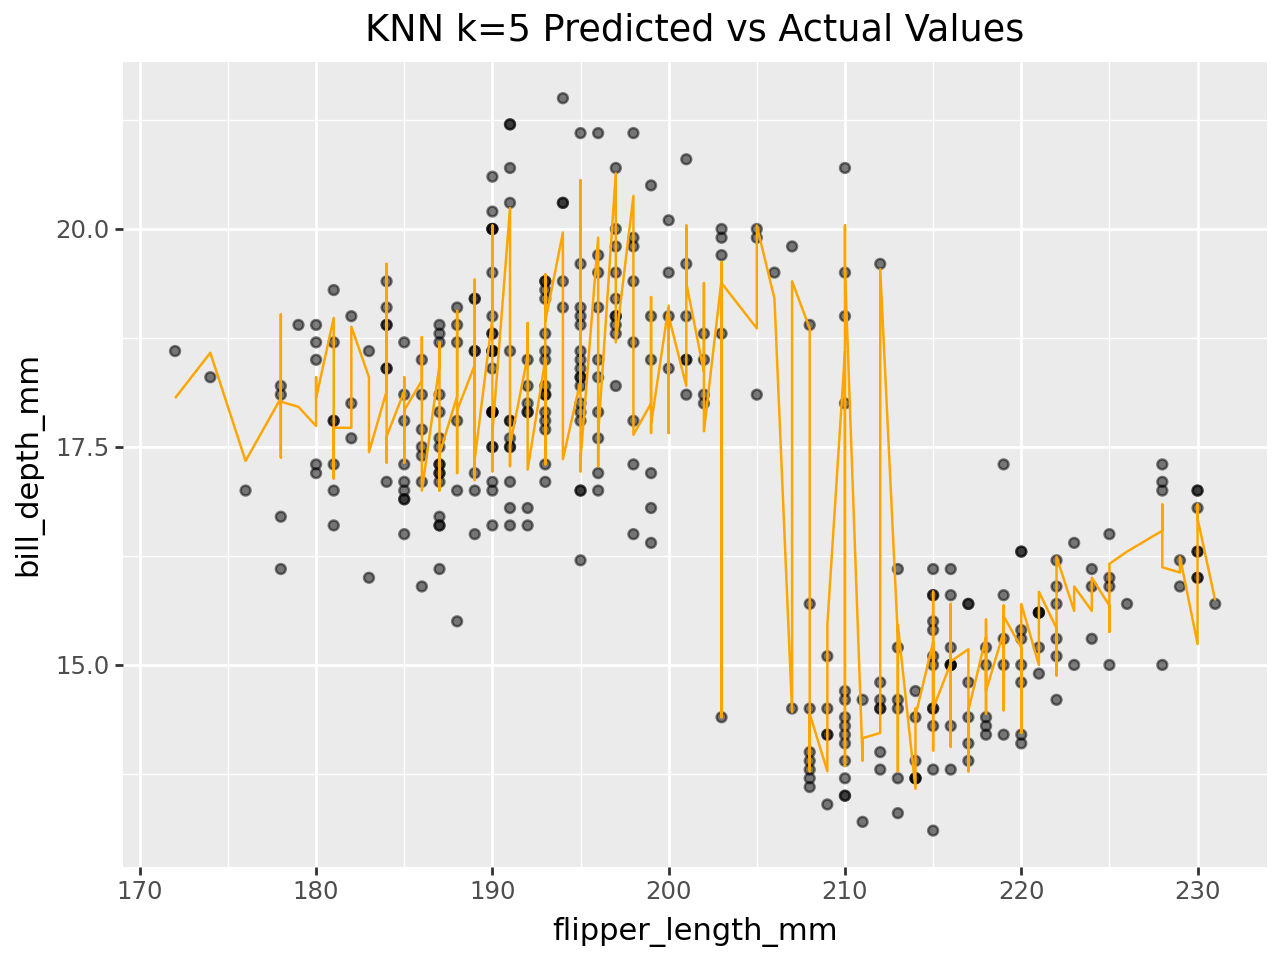

In [44]:
(ggplot(data, aes(x='flipper_length_mm', y='bill_depth_mm')) +
    geom_point(alpha=0.5) +
    geom_line(aes(y='y_pred_knn'), color="orange") +
    labs(title="KNN k=5 Predicted vs Actual Values")
)

Knn 2

In [45]:
ct_knn = ColumnTransformer(
    [
        ("dummify",
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_pipeline2 = Pipeline(
    [
        ("preprocessing", ct_knn),
        ("knn", KNeighborsRegressor(n_neighbors=15))
    ]
).set_output(transform="pandas")



In [46]:
knn_pipeline2.fit(X, y)


y_pred_knn2 = knn_pipeline2.predict(X)
mse = mean_squared_error(y, y_pred_knn2)
mse

0.5585851851851853

In [47]:
r2_train = knn_pipeline2.score(X, y)
r2_train

0.8563459372479199

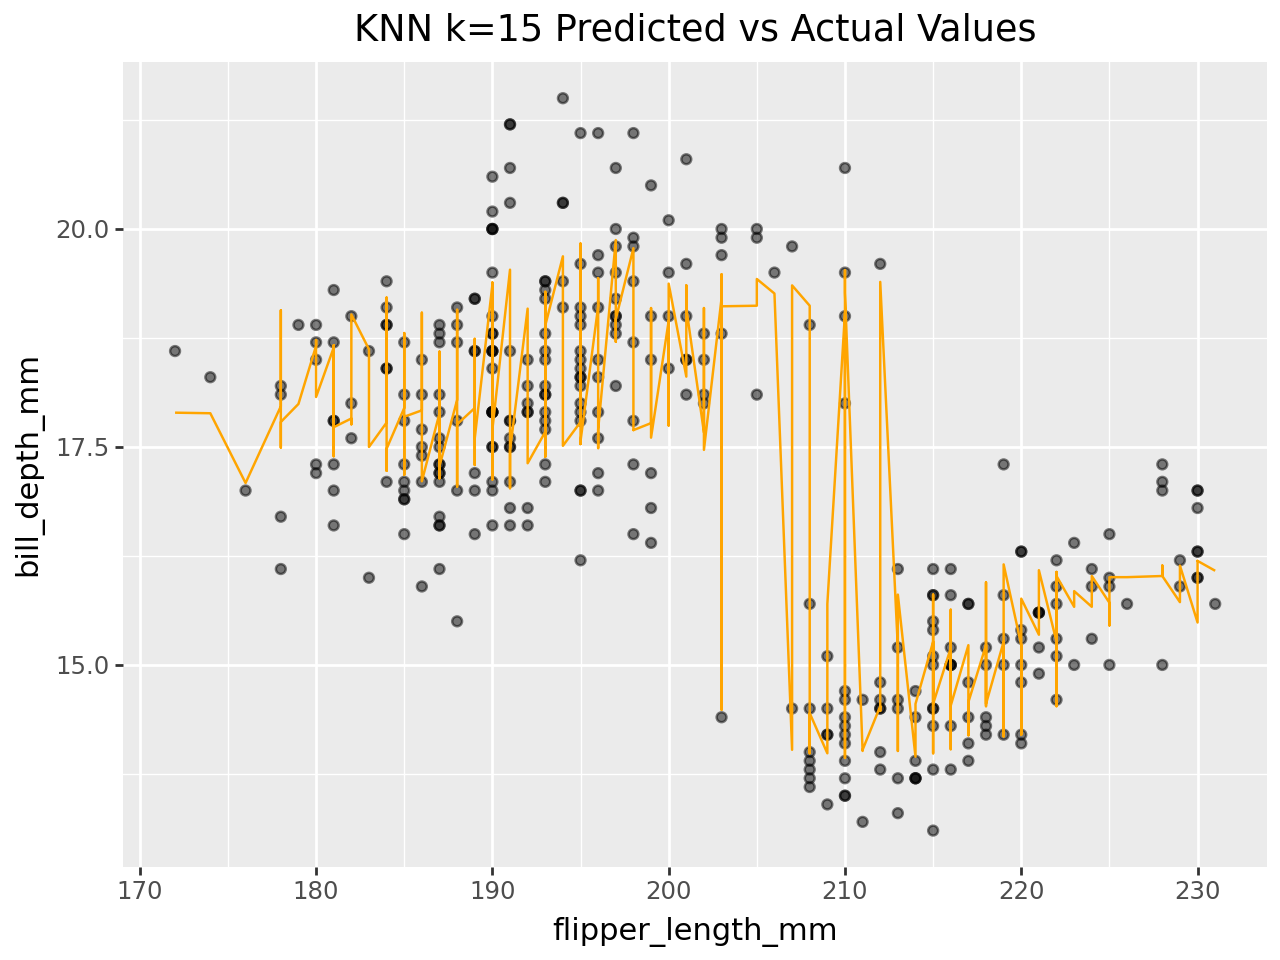

In [48]:
(ggplot(data, aes(x='flipper_length_mm', y='bill_depth_mm')) +
    geom_point(alpha=0.5) +
    geom_line(aes(y='y_pred_knn2'), color="orange") +
    labs(title="KNN k=15 Predicted vs Actual Values")
)


Decision tree

In [49]:
ct_tree = ColumnTransformer(
    [
        ("dummify",
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

tree_pipeline = Pipeline(
    [
        ("preprocessing", ct_knn),
        ("tree", DecisionTreeRegressor())
    ]
).set_output(transform="pandas")


In [50]:
tree_pipeline.fit(X, y)
y_pred_tree = tree_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_tree)
mse

0.0

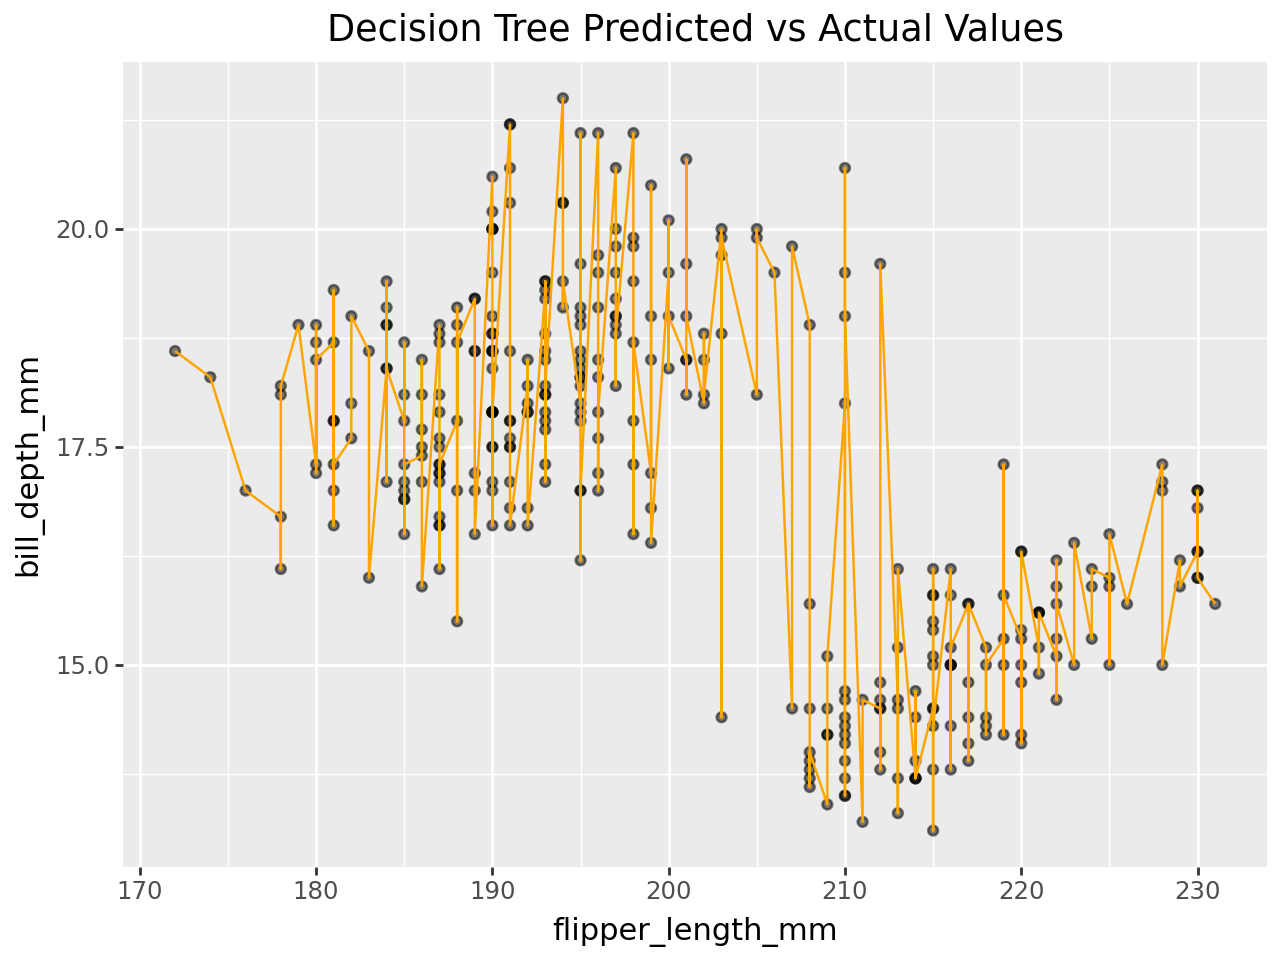

In [51]:
(ggplot(data, aes(x='flipper_length_mm', y='bill_depth_mm')) +
    geom_point(alpha=0.5) +
    geom_line(aes(y='y_pred_tree'), color="orange") +
    labs(title="Decision Tree Predicted vs Actual Values")
)

Final Outcomes

Since it was fitted on the entrie dataset the decision tree preforms best hitting every single value with a 0 MSE, while this is great the model would be totally unreliable predicting other data so the next best option is the knn with 5 neighbors witha mse of 0.4469 and a R^2 of 88.5%!

(while not really interpretable below is the plot of all predictors vs actual)

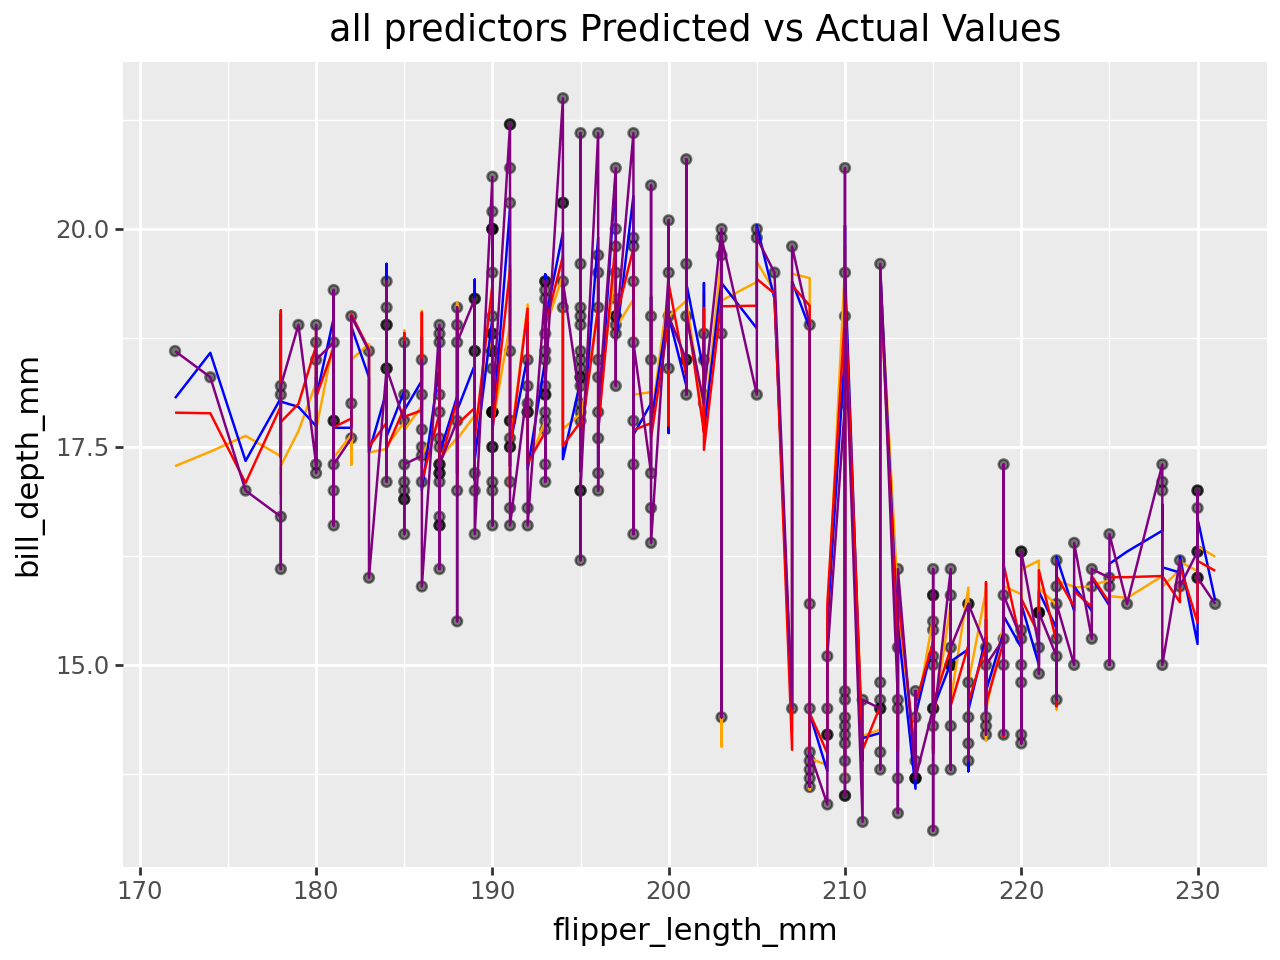

In [52]:
(ggplot(data, aes(x='flipper_length_mm', y='bill_depth_mm'))+
     geom_point(alpha=0.5)+
     geom_line(aes(y='y_pred_lr'), color="orange")+
     geom_line(aes(y='y_pred_knn'), color="blue")+
     geom_line(aes(y='y_pred_knn2'), color="red")+
     geom_line(aes(y='y_pred_tree'), color="purple")+
     labs(title="all predictors Predicted vs Actual Values")
)